In [6]:
import random
import math

SAMPLES = 50
ORIGINAL = [i for i in range(1, SAMPLES+1)]


PROB = 8.0
WEIGHTS = [1. - PROB, PROB]

VOTES_BEGIN = 100
VOTES_END = 2000
STEP = 10

In [7]:
ELO_0 = 1500
K_0 = 40
K = 20

def compute_estimated(r_a, r_b):
    return 1. / (1. + 10**((r_b - r_a) / 400))

def compute_new_rating(r_a, k, win, e_a):
    _w = 1 if win else 0
    return r_a + k * (_w - e_a)

In [8]:
# Using permutations matrices
# Ref: https://math.stackexchange.com/questions/2492954/distance-between-two-permutations

def distance(new, old):
    d = len(new)
    for i in range(len(new)):
        if new[i] == old[i]: 
            d -= 1
    return d / len(new)

print(distance([1,2,3,4,5,6,7,8], [1,2,3,4,5,6,7,8]))
print(distance([1,3,2,5,4,7,6,8], [1,2,3,4,5,6,7,8]))
print(distance([8,7,6,5,4,3,2,1], [1,2,3,4,5,6,7,8]))

0.0
0.75
1.0


In [9]:
votes = VOTES_BEGIN
accuracy = []

while votes <= VOTES_END:
    users = {
        d: {"votes": 0, "elo": ELO_0}
        for d in ORIGINAL
    }

    for i in range(votes):
        a, b = random.sample(ORIGINAL, k=2)
        
        if a < b:
            tmp = [a, b]
        else:
            tmp = [b, a]
    
        winner = random.choices(tmp, WEIGHTS)[0]
        loser = b if winner == a else a
        
        estimate_winner = compute_estimated(users[winner]["elo"], users[loser]["elo"])
        estimate_loser = compute_estimated(users[loser]["elo"], users[winner]["elo"])
        
        new_elo_winner = compute_new_rating(
            users[winner]["elo"],
            K_0 if users[winner]["votes"] == 0 else K,
            True,
            estimate_winner)
        
        new_elo_loser = compute_new_rating(
            users[loser]["elo"],
            K_0 if users[loser]["votes"] == 0 else K,
            True,
            estimate_loser)
        
        users[winner]["votes"] += 1 
        users[loser]["votes"] += 1
        
        users[winner]["elo"] = new_elo_winner 
        users[loser]["elo"] = new_elo_loser

    tmp = [(k, v["elo"], v["votes"]) for k, v in users.items()]
    tmp.sort(key=lambda x: x[2], reverse=True)
    
    new = [i for i, _, _ in tmp]
    
    d = distance(ORIGINAL, new)
    accuracy.append((votes, d))
    
    votes += STEP

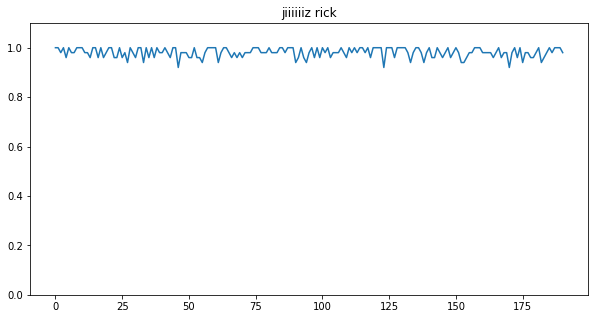

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,5))
plt.title('jiiiiiiz rick')
x, y = zip(*accuracy)
plt.plot(y)

# plt.scatter(*zip(*accuracy))
# plt.xlim(x[0],x[len(y)-1])

plt.ylim(0,1.1)

plt.plot()
plt.draw()